In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import tensorflow as tf 

In [29]:
df = pd.read_csv("Sentiment.csv")

In [30]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [31]:
df = df.loc[:, ["candidate", "sentiment", "text"]]
df.head()

,candidate,sentiment,text
0,No candidate mentioned,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Scott Walker,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,No candidate mentioned,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,No candidate mentioned,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Donald Trump,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


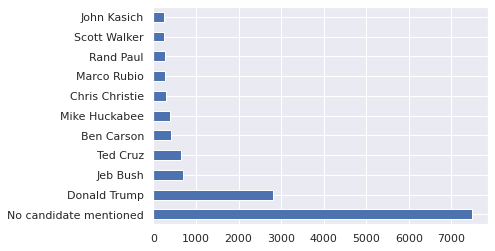

In [32]:
df.candidate.value_counts().plot.barh()

In [33]:
df.groupby(["candidate", "sentiment"]).count()

text
candidate              sentiment      
Ben Carson             Negative    186
                       Neutral      54
                       Positive    164
Chris Christie         Negative    218
                       Neutral      42
                       Positive     33
Donald Trump           Negative   1758
                       Neutral     446
                       Positive    609
Jeb Bush               Negative    589
                       Neutral      72
                       Positive     44
John Kasich            Negative     82
                       Neutral      47
                       Positive    113
Marco Rubio            Negative    105
                       Neutral      51
                       Positive    119
Mike Huckabee          Negative    237
                       Neutral      83
                       Positive     73
No candidate mentioned Negative   4724
                       Neutral    2087
                       Positive    680
Rand Paul              Negative    148
                       Neutral      60
                       Positive     55
Scott Walker           Negative    179
                       Neutral      38
                       Positive     42
Ted Cruz               Negative    221
                       Neutral     126
                       Positive    290

In [34]:
df.text

0        RT @NancyLeeGrahn: How did everyone feel about...
1        RT @ScottWalker: Didn't catch the full #GOPdeb...
2        RT @TJMShow: No mention of Tamir Rice and the ...
3        RT @RobGeorge: That Carly Fiorina is trending ...
4        RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                               ...                        
13866    RT @cappy_yarbrough: Love to see men who will ...
13867    RT @georgehenryw: Who thought Huckabee exceede...
13868    RT @Lrihendry: #TedCruz As President, I will a...
13869    RT @JRehling: #GOPDebate Donald Trump says tha...
13870    RT @Lrihendry: #TedCruz headed into the Presid...
Name: text, Length: 13871, dtype: object

In [35]:
df["text"] = df.text.str.lower()
df["text"] = df.text.str.replace("rt @", "")

In [36]:
df.text

0        nancyleegrahn: how did everyone feel about the...
1        scottwalker: didn't catch the full #gopdebate ...
2        tjmshow: no mention of tamir rice and the #gop...
3        robgeorge: that carly fiorina is trending -- h...
4        danscavino: #gopdebate w/ @realdonaldtrump del...
                               ...                        
13866    cappy_yarbrough: love to see men who will neve...
13867    georgehenryw: who thought huckabee exceeded th...
13868    lrihendry: #tedcruz as president, i will alway...
13869    jrehling: #gopdebate donald trump says that he...
13870    lrihendry: #tedcruz headed into the presidenti...
Name: text, Length: 13871, dtype: object

In [37]:
import string, re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# re - regex - Regular Expressions
df["text"] = df.text.apply(lambda x: re.sub('[^a-zA-Z0-9\s]', "", x))

In [39]:
df.text

0        nancyleegrahn how did everyone feel about the ...
1        scottwalker didnt catch the full gopdebate las...
2        tjmshow no mention of tamir rice and the gopde...
3        robgeorge that carly fiorina is trending  hour...
4        danscavino gopdebate w realdonaldtrump deliver...
                               ...                        
13866    cappyyarbrough love to see men who will never ...
13867    georgehenryw who thought huckabee exceeded the...
13868    lrihendry tedcruz as president i will always t...
13869    jrehling gopdebate donald trump says that he d...
13870    lrihendry tedcruz headed into the presidential...
Name: text, Length: 13871, dtype: object

In [40]:
# Remove Stop Words 
# Lemma also

In [ ]:
# running is very good for health. I run every day. Did you ran yesterday ? 
# Lemma 
# run is very good for health. I run every day. Did you run yesterday ? 
# run - 3 

In [41]:
# Problems ahead us - 
# 1. They are words - convert them to numbers 
# 2. Context - ??


# Example - I went to dinner with Sam, he seems to be a nice guy. Should I consider him for the PhD grant ? 

# Solution- 
# 1. RNN  - problem with RNN is low memory
# 2. LSTM - Long Short Term Memory
# It has a very good memeory but it is short term also. 

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png"/>

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
max_feature = 2000
token = Tokenizer(max_feature, split=" ")

In [45]:
token.fit_on_texts(df.text)

In [47]:
X = token.texts_to_sequences(df.text)

In [49]:
len(X)

13871

In [50]:
X[0]

[52, 78, 339, 449, 22, 2, 413, 360, 95, 29, 51, 1021, 1]

In [52]:
X[1]

[349,
 123,
 1929,
 2,
 595,
 1,
 29,
 51,
 226,
 35,
 195,
 5,
 172,
 1396,
 10,
 1555,
 1328,
 833]

In [53]:
len(X[0]), len(X[1]), len(X[2])

(13, 18, 11)

In [ ]:
token.word_index

In [54]:
# length of every tweet is different, we need to make them of same length! 

In [57]:
X_pad = pad_sequences(X)

In [60]:
len(X_pad[0]), len(X_pad[1]), len(X_pad[2])

(28, 28, 28)

In [61]:
# every tweet has now same tokens (we prepended 0's)

In [62]:
len(X_pad) # no of tweets

13871

In [63]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_feature, 128, input_length=X_pad.shape[1]))
model.add(tf.keras.layers.LSTM(128, dropout=0.2))
model.add(tf.keras.layers.Dense(3, activation="softmax"))
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["acc"])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 128)           256000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 387,971
Trainable params: 387,971
Non-trainable params: 0
_________________________________________________________________


In [65]:
Y = pd.get_dummies(df.sentiment)

In [66]:
# "Neutral", "Pos", "Neg"
# 0, 1, 2
# Sentiment  |   Sent_neutral | Sent_Pos | Sent_neg
# Neutral    |             1  |      0    |   0 
# Pos        |          0     |      1    |   0 
# Neg        |         0      |      0    |   1

In [67]:
Y

,Negative,Neutral,Positive
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
13866,1,0,0
13867,0,0,1
13868,0,0,1
13869,1,0,0


In [ ]:
model.fit(X_pad, Y, epochs=10)

Epoch 1/10
434/434 [==============================] - 19s 39ms/step - loss: 0.8684 - acc: 0.6280
Epoch 2/10
434/434 [==============================] - 17s 39ms/step - loss: 0.7095 - acc: 0.6955
Epoch 3/10
434/434 [==============================] - 17s 40ms/step - loss: 0.6669 - acc: 0.7195
Epoch 4/10
434/434 [==============================] - 17s 39ms/step - loss: 0.6412 - acc: 0.7308
Epoch 5/10
434/434 [==============================] - 17s 39ms/step - loss: 0.6265 - acc: 0.7444
Epoch 6/10
199/434 [============>.................] - ETA: 9s - loss: 0.6065 - acc: 0.7566